In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

wine_file_path = '/Users/BryanGoldberg/Desktop/Personal Projects/winequality.csv'
wine = pd.read_csv(wine_file_path)
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


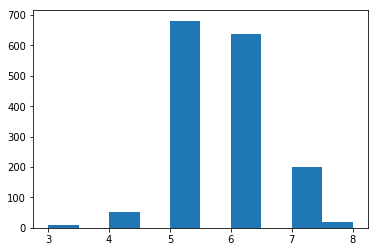

In [12]:
plt.hist(wine.quality)
plt.xlabels = ("Quality")
plt.ylabels = ("Frequency")
plt.show()

In [13]:
wine = pd.get_dummies(wine)
wine.iloc[:,5:].head(5)

,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
labels = np.array(wine['quality'])
wine = wine.drop('quality', axis = 1)
wine_list = list(wine.columns)
wine = np.array(wine)

In [15]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(wine, labels, test_size = .25, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape', test_features.shape)
print('Testing Labels Shape', test_labels.shape)

Training Features Shape: (1199, 11)
Training Labels Shape: (1199,)
Testing Features Shape (400, 11)
Testing Labels Shape (400,)


In [16]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [17]:
predictions = rf.predict(test_features)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'quality points')

Mean Absolute Error: 0.42 quality points


In [18]:
mape = 100 * (errors / test_labels)
#Calculate mean absolute error percentage

accuracy = 100 - np.mean(mape)
#Calculate and Display Accuracy

print('Accuracy:', round(accuracy, 2), '%')

Accuracy: 92.27 %


In [19]:
from sklearn.tree import export_graphviz 
import pydot

tree = rf.estimators_[5]

export_graphviz(tree, out_file = 'tree.dot', feature_names = wine_list, rounded = True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('tree.dot')

graph.write_png('tree.png')

FileNotFoundError: [Errno 2] "dot" not found in path.

In [24]:
importances = list(rf.feature_importances_)

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(wine_list, importances)]

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: alcohol              Importance: 0.29
Variable: sulphates            Importance: 0.14
Variable: volatile acidity     Importance: 0.11
Variable: total sulfur dioxide Importance: 0.08
Variable: chlorides            Importance: 0.07
Variable: residual sugar       Importance: 0.06
Variable: pH                   Importance: 0.06
Variable: fixed acidity        Importance: 0.05
Variable: citric acid          Importance: 0.05
Variable: density              Importance: 0.05
Variable: free sulfur dioxide  Importance: 0.04


[None, None, None, None, None, None, None, None, None, None, None]

In [26]:
rf_most_important.fit(train_important, train_labels)
#Train the random forest

predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)
#Making predictions and determing the error

print('Mean Absolute Error', round(np.mean(errors), 2), 'quality points')
mape = np.mean(100 * (errors / test_labels))
print('Accuracy:', round(accuracy, 2), '%')
#Displaying Performance Metrics

Mean Absolute Error 0.54 quality points
Accuracy: 92.27 %


Text(0.5,1,'Variable Importances')

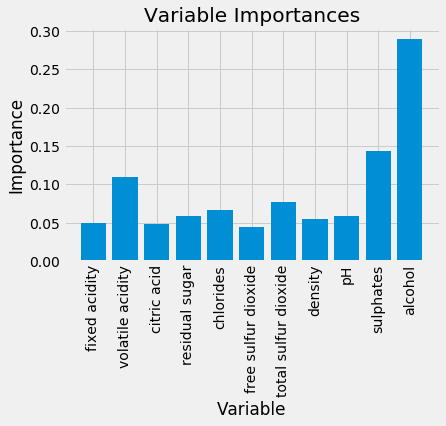

In [27]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('fivethirtyeight')

x_values = list(range(len(importances)))

plt.bar(x_values, importances, orientation = 'vertical')
#Making a bar chart of the different feature importancs.

plt.xticks(x_values, wine_list, rotation = 'vertical')
#Tick labels for x-axis

plt.ylabel('Importance'); plt.xlabel('Variable')
plt.title('Variable Importances')